In [149]:
import pandas as pd
import numpy as np
% pylab inline 
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [150]:
train = pd.read_csv("B:/Case studies/Big Market Sale/train.csv")
test = pd.read_csv("B:/Case studies/Big Market Sale/test.csv")

In [151]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [1027]:
train.isnull().sum()
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
Outlet_Establishment_Time       0
Item_Outlet_Sales               0
dtype: int64

In [257]:
train.info() 
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
Outlet_Establishment_Time    8523 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 865.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 13 columns):
Item_Identifier              5681 non-null object
Item_Weight         

In [154]:
train.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [155]:
train.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [156]:
train.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [157]:
train.Outlet_Establishment_Year.unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [161]:
combo['Outlet_Establishment_Time'] = 2013 - combo['Outlet_Establishment_Year']
combo['Outlet_Establishment_Time'] = 2013 - combo['Outlet_Establishment_Year']

In [16]:
train.Outlet_Establishment_Time.unique()

array([14,  4, 15, 26, 28, 11,  6, 16,  9], dtype=int64)

In [17]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Establishment_Time
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914,15.168133
std,4.643456,0.051598,62.275067,8.371760,1706.499616,8.371760
min,4.555000,0.000000,31.290000,1985.000000,33.290000,4.000000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400,9.000000
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000,14.000000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400,26.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,28.000000


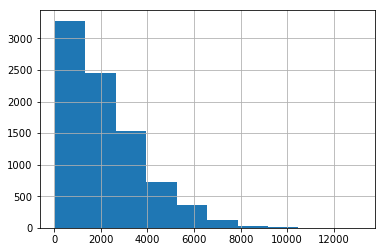

In [18]:
train['Item_Outlet_Sales'].hist(bins=10)

In [19]:
train['No of Items'] = train['Item_Outlet_Sales']/train['Item_MRP']

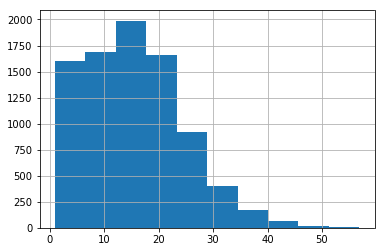

In [21]:
train['No of Items'].hist(bins=10)

In [22]:
train['No of Items'].describe()

count    8523.000000
mean       15.425685
std         9.192655
min         0.952322
25%         8.949479
50%        14.926893
75%        21.092696
max        56.844890
Name: No of Items, dtype: float64

In [24]:
Q1 = train['Item_Outlet_Sales'].quantile(0.25)
Q3 = train['Item_Outlet_Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR


In [25]:
lower_limit

-2566.3261

In [26]:
upper_limit

6501.8699

In [30]:
train[train['Item_Outlet_Sales']>upper_limit].Item_Outlet_Sales.describe()

count      186.000000
mean      7646.329986
std       1113.245443
min       6503.534400
25%       6853.079400
50%       7256.887100
75%       8101.953750
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [44]:
sup=train[train['Item_Outlet_Sales']>upper_limit]

In [54]:
train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [1035]:
temp = sup.pivot_table(values = 'Item_Outlet_Sales', columns= 'Outlet_Type', aggfunc= 'sum')

In [162]:
test['Item_Outlet_Sales'] = 1

In [1024]:
frames = [train,test]
combo = pd.concat(frames,axis = 0)

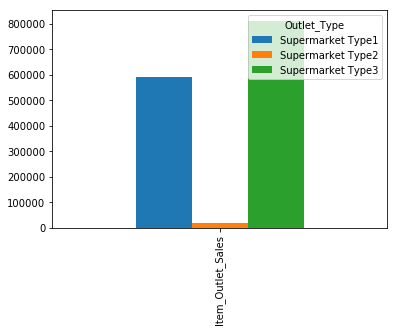

In [59]:
temp.plot(kind= 'bar')

In [1025]:
combo['Item_Fat_Content'] = combo['Item_Fat_Content'].str.replace('low fat','Low Fat')
combo['Item_Fat_Content'] = combo['Item_Fat_Content'].str.replace('LF','Low Fat')
combo['Item_Fat_Content'] = combo['Item_Fat_Content'].str.replace('reg','Regular')

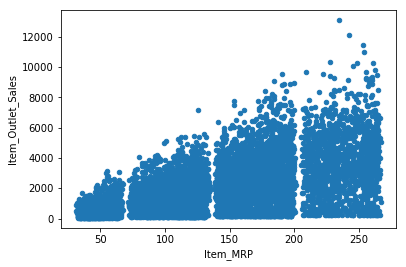

In [62]:
train.plot.scatter('Item_MRP','Item_Outlet_Sales')

In [71]:
temp2 = train.pivot_table(values = 'Item_Outlet_Sales', columns= 'Outlet_Type', index='Outlet_Location_Type', aggfunc= 'sum')

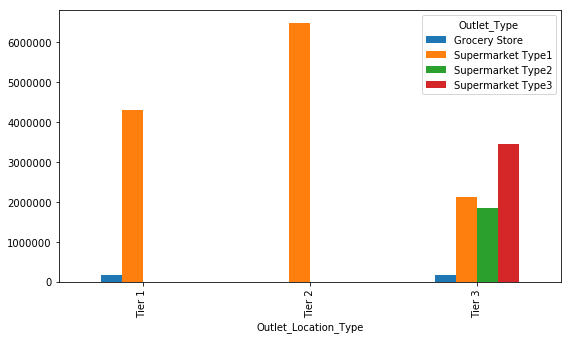

In [95]:
temp2.plot(kind= 'bar',figsize=(9,5), sharey = True)

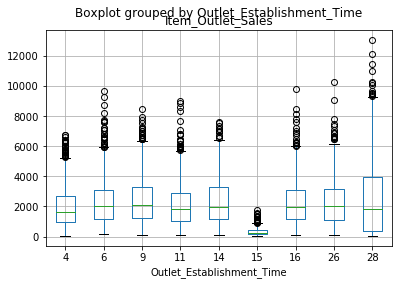

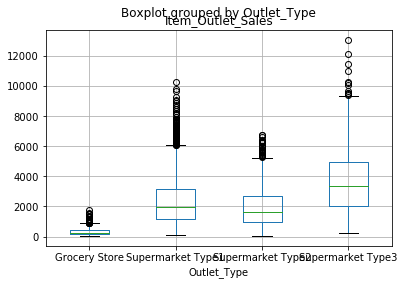

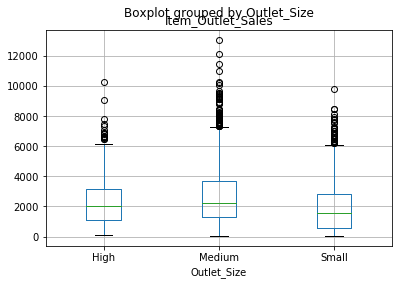

In [75]:
train.boxplot(column='Item_Outlet_Sales', by = 'Outlet_Establishment_Time')
train.boxplot(column='Item_Outlet_Sales', by = 'Outlet_Type')
train.boxplot(column='Item_Outlet_Sales', by = 'Outlet_Size')

In [73]:
temp2

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,,,,
Tier 1,179694.0936,4.302365e+06,NaN,NaN
Tier 2,NaN,6.472314e+06,NaN,NaN
Tier 3,188340.1724,2.142664e+06,1851822.83,3.453926e+06


In [168]:
combo.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [110]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Outlet_Establishment_Time      int64
No of Items                  float64
dtype: object

In [112]:
pd.crosstab(train.Outlet_Size,train.Outlet_Location_Type)

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,0,1863
Small,1458,930,0


In [504]:
pd.crosstab(result.Outlet_Size,result.Outlet_Type_cat)

Outlet_Type_cat,0,1,2,3
Outlet_Size_cat,,,,
-1,925,3091,0,0
0,0,1553,0,0
1,0,1550,1546,1559
2,880,3100,0,0


In [586]:
combo['Item_Identifier_cat'] = combo['Item_Identifier'].str[0:2]

In [510]:
pd.crosstab(train.Outlet_Size,train.Outlet_Type)

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,932,0,0
Medium,0,930,928,935
Small,528,1860,0,0


In [215]:
pd.crosstab(train.Outlet_Type,train.Outlet_Location_Type)

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Type,,,
Grocery Store,528,0,555
Supermarket Type1,1860,2785,932
Supermarket Type2,0,0,928
Supermarket Type3,0,0,935


In [652]:
objecttrain = combo.select_dtypes(include=['object']).copy()
objecttrain.head()

,Item_Fat_Content,Item_Identifier,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Identifier_cat
0,Low Fat,FDA15,Dairy,OUT049,Tier 1,Medium,Supermarket Type1,FD
1,Regular,DRC01,Soft Drinks,OUT018,Tier 3,Medium,Supermarket Type2,DR
2,Low Fat,FDN15,Meat,OUT049,Tier 1,Medium,Supermarket Type1,FD
3,Regular,FDX07,Fruits and Vegetables,OUT010,Tier 3,NaN,Grocery Store,FD
4,Low Fat,NCD19,Household,OUT013,Tier 3,High,Supermarket Type1,NC


In [653]:
objecttrain['Outlet_Type'] = objecttrain['Outlet_Type'].astype('category')
objecttrain['Outlet_Location_Type'] = objecttrain['Outlet_Location_Type'].astype('category')
objecttrain['Item_Fat_Content'] = objecttrain['Item_Fat_Content'].astype('category')
objecttrain['Outlet_Size'] = objecttrain['Outlet_Size'].astype('category')
objecttrain['Item_Type'] = objecttrain['Item_Type'].astype('category')
objecttrain['Item_Identifier_cat'] = objecttrain['Item_Identifier_cat'].astype('category')

In [654]:
objecttrain.dtypes


Item_Fat_Content        category
Item_Identifier           object
Item_Type               category
Outlet_Identifier         object
Outlet_Location_Type    category
Outlet_Size             category
Outlet_Type             category
Item_Identifier_cat     category
dtype: object

In [655]:
combo['Item_Identifier_cat'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [656]:
objecttrain['Outlet_Type_cat'] = objecttrain['Outlet_Type'].cat.codes
objecttrain['Outlet_Location_Type_cat'] = objecttrain['Outlet_Location_Type'].cat.codes
objecttrain['Outlet_Size_cat'] = objecttrain['Outlet_Size'].cat.codes
objecttrain['Item_Fat_Content_cat'] = objecttrain['Item_Fat_Content'].cat.codes
objecttrain['Item_Type_cat'] = objecttrain['Item_Type'].cat.codes
objecttrain['Item_Identifier_cat2'] = objecttrain['Item_Identifier_cat'].cat.codes

In [657]:
objecttrain['Outlet_Type'] = objecttrain['Outlet_Type'].astype('object')
objecttrain['Outlet_Location_Type'] = objecttrain['Outlet_Location_Type'].astype('object')
objecttrain['Item_Fat_Content'] = objecttrain['Item_Fat_Content'].astype('object')
objecttrain['Outlet_Size'] = objecttrain['Outlet_Size'].astype('object')
objecttrain['Item_Type'] = objecttrain['Item_Type'].astype('object')

In [196]:
objecttrain.corr()

,Outlet_Type_cat,Outlet_Location_Type_cat,Outlet_Size_cat,Item_Fat_Content_cat,Item_Type_cat
Outlet_Type_cat,1.000000,0.467251,0.158748,-0.000228,0.004305
Outlet_Location_Type_cat,0.467251,1.000000,-0.385616,0.001373,0.002083
Outlet_Size_cat,0.158748,-0.385616,1.000000,-0.000815,-0.001364
Item_Fat_Content_cat,-0.000228,0.001373,-0.000815,1.000000,-0.147733
Item_Type_cat,0.004305,0.002083,-0.001364,-0.147733,1.000000


In [658]:
frames = [combo,objecttrain]
result = pd.merge(combo, objecttrain, how='inner', on=['Item_Fat_Content', 'Item_Identifier','Item_Identifier_cat','Item_Type','Outlet_Identifier','Outlet_Location_Type','Outlet_Size','Outlet_Type'])

In [881]:
result['Outlet_Type_cat'] = result['Outlet_Type_cat'].astype('object')
result['Outlet_Location_Type_cat'] = result['Outlet_Location_Type_cat'].astype('object')
result['Outlet_Size_cat'] = result['Outlet_Size_cat'].astype('object')
result['Item_Fat_Content_cat'] = result['Item_Fat_Content_cat'].astype('object')
result['Item_Type_cat'] =result['Item_Type_cat'].astype('object')
result['Item_Identifier_cat2'] = result['Item_Identifier_cat2'].astype('object')

In [267]:
result.columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Type', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Time', 'Outlet_Establishment_Year',
       'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Size',
       'Outlet_Type', 'Outlet_Type_cat', 'Outlet_Location_Type_cat',
       'Outlet_Size_cat', 'Item_Fat_Content_cat', 'Item_Type_cat'],
      dtype='object')

In [884]:
weight_avg = result.groupby('Item_Identifier').Item_Weight.mean()
miss_bool = result['Item_Weight'].isnull() 
def getweight(my):
    return weight_avg[my]
result.loc[miss_bool,'Item_Weight'] = result.loc[miss_bool,'Item_Identifier'].apply(getweight)

In [885]:
visibility_avg = result.groupby('Item_Identifier').Item_Visibility.mean()
miss_bool = (result['Item_Visibility'] == 0) 
def getvisibility(my):
    return visibility_avg[my]
result.loc[miss_bool,'Item_Visibility'] = result.loc[miss_bool,'Item_Identifier'].apply(getvisibility)

In [ ]:
weight_avg = result.groupby('Outlet_Type').Outlet_Size.mode()
miss_bool = result['Item_Weight'].isnull() 
def getweight(my):
    return weight_avg[my]
result.loc[miss_bool,'Item_Weight'] = result.loc[miss_bool,'Item_Identifier'].apply(getweight)

In [886]:
result['Outlet_Identifier'] = result['Outlet_Identifier'].astype('str')
result['Outlet_Identifier_no'] =  result['Outlet_Identifier'].str[3:6]

In [1022]:
ctrain=result.loc[0:5522,:]
ctest =result.loc[5523:8522:]
X = ctrain[['Item_Fat_Content_cat','Item_Type_cat','Item_Visibility','Outlet_Location_Type_cat', 'Item_Weight','Outlet_Establishment_Time','Item_MRP','Outlet_Type_cat']]
Y = ctrain[['Item_Outlet_Sales']]
t = ctest[['Item_Fat_Content_cat','Item_Type_cat','Item_Visibility','Outlet_Location_Type_cat', 'Item_Weight','Outlet_Establishment_Time','Item_MRP','Outlet_Type_cat']]
# importing random forest
from sklearn.ensemble import RandomForestRegressor
seed(50)
Regressor=RandomForestRegressor(n_estimators= 200 ,max_features=6,min_samples_leaf=40,max_depth = 6, oob_score=True)
Regressor.fit(X,Y)
predicted= Regressor.predict(t)


C:\Users\Akhand\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


In [1023]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(ctest['Item_Outlet_Sales'], predicted))
rms

1077.139359195571

In [1019]:
ftrain = result.loc[0:8522,:]
ftest = result.loc[8523:14203,:]


In [987]:
x = ftrain[['Item_Fat_Content_cat','Item_Type_cat','Item_Visibility','Outlet_Location_Type_cat', 'Item_Weight','Outlet_Establishment_Time','Item_MRP','Outlet_Type_cat']]
y = ftrain[['Item_Outlet_Sales']]
T = ftest[['Item_Fat_Content_cat','Item_Type_cat','Item_Visibility','Outlet_Location_Type_cat', 'Item_Weight','Outlet_Establishment_Time','Item_MRP','Outlet_Type_cat']]

In [988]:
from sklearn.ensemble import RandomForestRegressor
seed(50)
Regressor=RandomForestRegressor(n_estimators= 200,max_features=6,min_samples_leaf=40,max_depth =6,oob_score=True)
Regressor.fit(x,y)
predicted= Regressor.predict(T)

C:\Users\Akhand\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [989]:
predicted

array([ 1655.0543139 ,  1418.10829388,   624.26631933, ...,  1946.21566677,
        3665.58809868,  1316.35098955])

In [990]:
# Make submission file and submit
submission = pd.DataFrame({'Item_Identifier':test['Item_Identifier'],'Outlet_Identifier':test['Outlet_Identifier'],'Item_Outlet_Sales': predicted},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])
submission.to_csv('bMs4.csv', index = False)

In [926]:
Regressor.feature_importances_

array([  5.26862424e-04,   2.40012634e-03,   5.50385141e-03,
         6.41076770e-02,   5.54973007e-01,   3.66358768e-01,
         6.12970842e-03])